## Observations and Insights 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [120]:
# Combine the data into a single dataset
combined_data_raw = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_data_raw

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [121]:
# Returns all the mouse data for each mouse to be stored in a dictionary
# might not be needed now - collecting all data specific to each mouse in a dataframe object instead of the dictionary this function builds
'''
def getMouseData(m):
    d = {}
    mouse_subset = combined_data.loc[combined_data["Mouse ID"] == m,]
    d["Drug"] = mouse_subset["Drug Regimen"].values[0]
    d["Sex"] = mouse_subset["Sex"].values[0]
    d["Age(mos)"] = mouse_subset["Age_months"].values[0]
    d["Weight(g)"] = mouse_subset["Weight (g)"].values[0]
    timepoints = mouse_subset["Timepoint"].values
    tumors = mouse_subset["Tumor Volume (mm3)"].values
    d["Data"] = {timepoints[i]: tumors[i] for i in range(len(timepoints))}
    return d
'''

'\ndef getMouseData(m):\n    d = {}\n    mouse_subset = combined_data.loc[combined_data["Mouse ID"] == m,]\n    d["Drug"] = mouse_subset["Drug Regimen"].values[0]\n    d["Sex"] = mouse_subset["Sex"].values[0]\n    d["Age(mos)"] = mouse_subset["Age_months"].values[0]\n    d["Weight(g)"] = mouse_subset["Weight (g)"].values[0]\n    timepoints = mouse_subset["Timepoint"].values\n    tumors = mouse_subset["Tumor Volume (mm3)"].values\n    d["Data"] = {timepoints[i]: tumors[i] for i in range(len(timepoints))}\n    return d\n'

In [122]:
# Checking the number of mice.
mice_unique = combined_data_raw["Mouse ID"].unique()
len(mice_unique)

249

In [123]:
# Removing the duplicate rows that shows up for Mouse ID and Timepoint.
combined_data_raw["Dupe?"] = combined_data_raw.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
duped_mouse = combined_data_raw.loc[combined_data_raw["Dupe?"] == True,]["Mouse ID"]
duped_mouse = duped_mouse.unique()[0]
combined_data = combined_data_raw.loc[combined_data_raw["Mouse ID"] != duped_mouse,]
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dupe?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [124]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_timepoint_data = {}
for mouse in mice_unique:
    mice_timepoint_data[mouse] = combined_data.loc[combined_data["Mouse ID"] == mouse,]

mice_timepoint_data

{'k403':   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
 0     k403     Ramicane  Male          21          16          0   
 1     k403     Ramicane  Male          21          16          5   
 2     k403     Ramicane  Male          21          16         10   
 3     k403     Ramicane  Male          21          16         15   
 4     k403     Ramicane  Male          21          16         20   
 5     k403     Ramicane  Male          21          16         25   
 6     k403     Ramicane  Male          21          16         30   
 7     k403     Ramicane  Male          21          16         35   
 8     k403     Ramicane  Male          21          16         40   
 9     k403     Ramicane  Male          21          16         45   
 
    Tumor Volume (mm3)  Metastatic Sites  Dupe?  
 0           45.000000                 0  False  
 1           38.825898                 0  False  
 2           35.014271                 1  False  
 3           34.223992         

In [131]:
# Checking the number of mice in the clean DataFrame.
mice_unique_df = combined_data.groupby("Mouse ID")
mice_count = mice_unique_df["Mouse ID"].unique()
len(mice_count)

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
compare_drug_tumor = pd.DataFrame({})
compare_drug_tumor["Mean"] = grouped_drug.mean()
compare_drug_tumor["Median"] = grouped_drug.median()
compare_drug_tumor["Variance"] = grouped_drug.var()
compare_drug_tumor["Std Dev"] = grouped_drug.std()
compare_drug_tumor["Std Error"] = grouped_drug.sem()
compare_drug_tumor


,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame({})
summary_df["Summary of Drug Regimen"] = compare_drug_tumor.aggregate({"Mean": "mean",
                             "Median": "mean",
                             "Variance": "mean",
                             "Std Dev": "mean",
                             "Std Error": "mean"})
summary_df

,Summary of Drug Regimen
Mean,50.975982
Median,49.902123
Variance,47.858440
Std Dev,6.821103
Std Error,0.502785


## Bar and Pie Charts

In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tests_per_drug = combined_data.groupby("Drug Regimen")["Timepoint"].count()
tests_per_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

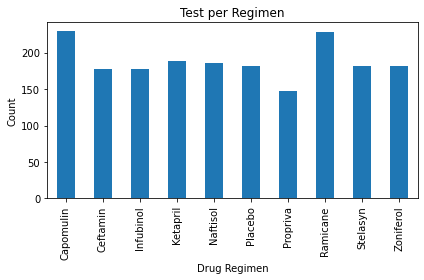

In [100]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tests_per_drug_plt = tests_per_drug.plot(kind="bar")
tests_per_drug_plt.set_title("Test per Regimen")
tests_per_drug_plt.set_xlabel("Drug Regimen")
tests_per_drug_plt.set_ylabel("Count")
plt.tight_layout()

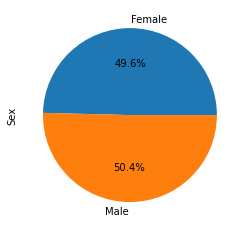

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_gender = combined_data.drop_duplicates("Mouse ID")
combined_gender = combined_gender.groupby("Sex")["Sex"].count()
gender_plt = combined_gender.plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1ab90c09ac0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

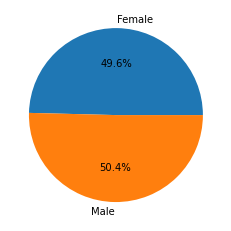

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = combined_gender.values
labels = combined_gender.index
plt.pie(x=x_axis, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
